# EDA PRACTICE WITH HEART DISEASE DATA    

Description of the Data
1. age: The patient's age in years.
2. sex: male or female
3. cp: chest pain type
4. trestbps (Resting Blood Pressure): Higher values may indicate hypertension
5. chol (Serum Cholesterol): Total cholesterol level
6. fbs (Fasting Blood Sugar): yes or no
7. restecg (Resting Electrocardiographic Results): 0 is normal.
8. thalach (Maximum Heart Rate Achieved): highest heart rate during excercise.
9. exang (Exercise-Induced Angina): whether chest pain is triggered by excercise.
10. oldpeak (ST Depression Induced by Exercise): higher value means greater stress
11. ca (Number of Major Vessels Colored by Fluoroscopy): higher value may indicate blockage
12. thal (Thalassemia Stress Test Result)
13. target (Presence of Heart Disease): no heart disease (0), patient (1)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


CHECK MISSING DATA

In [3]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

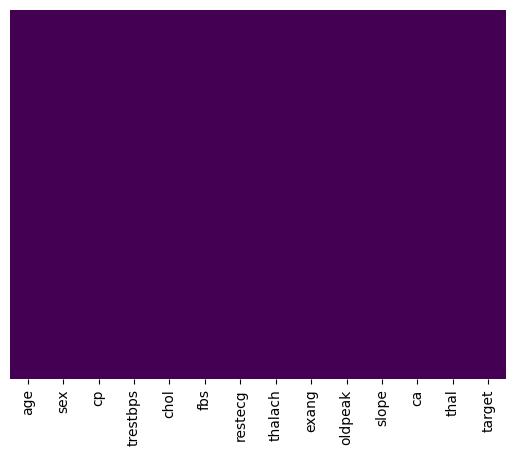

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no missing data. So, we will continue to visualize the data

<AxesSubplot:xlabel='target', ylabel='count'>

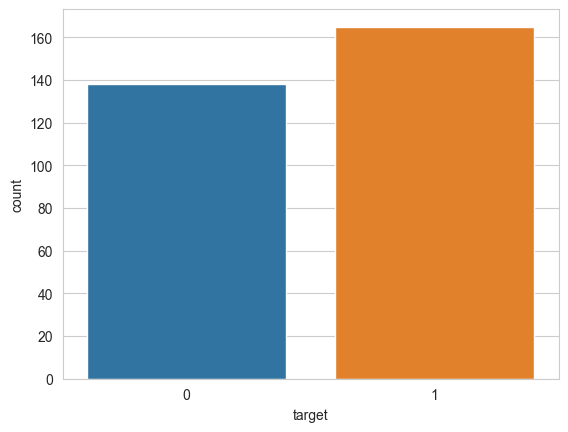

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

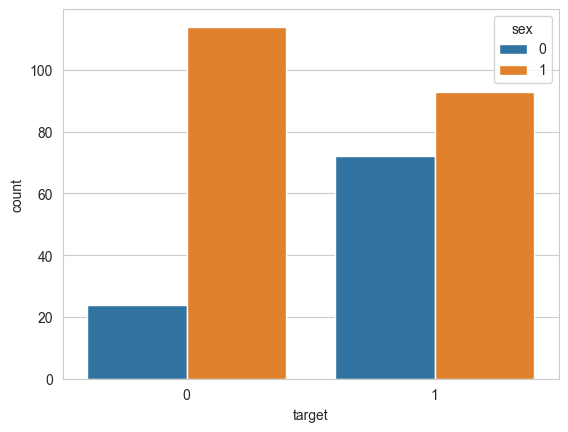

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df)  #target describes Heart Patient (1) or no (0)

<AxesSubplot:xlabel='age', ylabel='Count'>

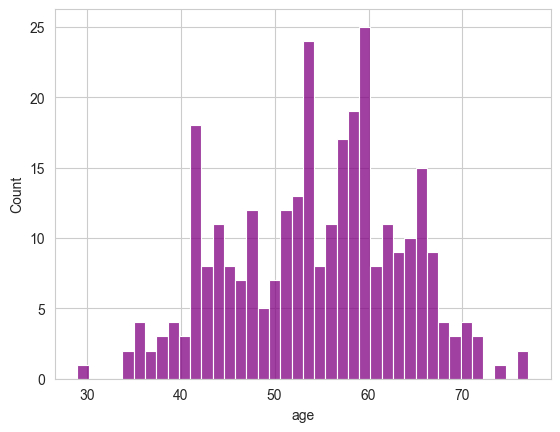

In [24]:
sns.histplot(df['age'].dropna(),kde=False,bins=40,color='purple')

<AxesSubplot:>

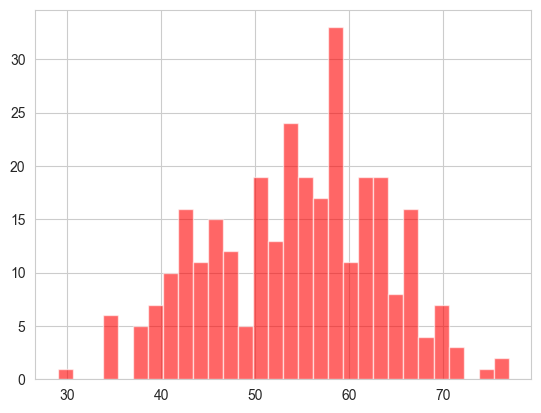

In [32]:
df['age'].hist(bins=30,color='red',alpha=0.6)

<AxesSubplot:xlabel='thal', ylabel='count'>

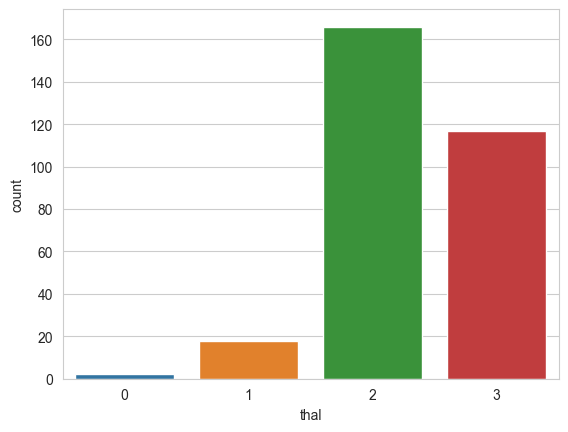

In [34]:
sns.countplot(x='thal',data=df)

### BUILDING A LOGISTIC REGRESSION MODEL

We will start by splitting the data

In [35]:
df.drop('target',axis=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
df['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split    

In [40]:
x_disease, x_test, y_disease, y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.30,random_state=101)

TRAINING AND PRACTICING

In [41]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(x_disease,y_disease)

LogisticRegression(max_iter=1000)

In [45]:
predictions = logmodel.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[34, 10],
       [ 3, 44]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8571428571428571

In [50]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

EVALUATION

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91

